<a href="https://colab.research.google.com/github/ngotancuong/ml/blob/main/Hyperparameter_tuning__Regularization_and_Optimazation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bài tập môn học Machine Learning
- Sử dụng các best-practices cho xây dựng ứng dụng học máy trong khoá học: <strong>"Hyperparameter tuning, Regularization and Optimazation"</strong>
- Phân tích <strong>sự cải thiện/hoặc làm suy giảm</strong> độ chính xác học máy sau các lần cải tiến ở từng bước trên (tối thiểu 3 cải tiến, bằng <strong>commment</strong> trong file colab)

> Thông tin:
- Lớp: MSE#11HCM
- Môn học MLE501
- Giảng viên: PGS. PHAN DUY HÙNG
- Học viên: Ngô Tấn Cường
- MSSV: 22MSE23071
- Github: https://github.com/ngotancuong


## Giới thiệu dataset
![](https://github.com/ngotancuong/ml/blob/main/datasets/house-prices-advanced/housesbanner.png?raw=true)

Với 79 biến giải thích mô tả (hầu hết) mọi khía cạnh của các ngôi nhà dân cư ở Ames, Iowa, cuộc thi này thách thức dự đoán giá cuối cùng của mỗi ngôi nhà.

Bộ dữ liệu Ames Housing do Dean De Cock biên soạn để sử dụng trong giáo dục khoa học dữ liệu. Bộ dữ liệu mô tả việc bán bất động sản nhà ở riêng lẻ ở Ames, Iowa từ năm 2006 đến năm 2010.

Đầu tiên, tôi thực hiện phân tích dữ liệu (Exploratory Data Analysis) để hiểu mối quan hệ tuyến tính giữa các biến quan trọng nhất và phát hiện các vấn đề tiềm ẩn như độ sai lệch, giá trị ngoại lai và giá trị còn thiếu. Sau đó, tôi xử lý các vấn đề này, làm sạch dữ liệu. Cuối cùng, tôi sẽ xây dựng các mô hình học máy để dự đoán giá nhà, điều chỉnh các siêu tham số, chính quy hoá (để tránh overfitting) và tối ưu hoá.

Link dataset trên Kaggle: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data


## 1. Chuẩn bị dữ liệu

### 1.1. Load libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")
sns.set_color_codes(palette='deep')

### 1.2. Load data

In [2]:
# Load dữ liệu từ tập tin trên GitHub (đã puplic) vào DataFrame sử dụng pandas
df_train = pd.read_csv('https://raw.githubusercontent.com/ngotancuong/ml/main/datasets/house-prices-advanced/train.csv', index_col='Id')
df_test = pd.read_csv('https://raw.githubusercontent.com/ngotancuong/ml/main/datasets/house-prices-advanced/test.csv', index_col='Id')
data = pd.concat((df_train, df_test)).reset_index(drop=True)
data.drop(['SalePrice'], axis=1, inplace=True)
print("Train data's size: ", df_train.shape)
print("Test data's size: ", df_test.shape)

Train data's size:  (1460, 80)
Test data's size:  (1459, 79)


### 1.3. Describe data

In [3]:
df_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## 2. Exploratory Data Analysis

### 2.1. Sale Price (biến mục tiêu)

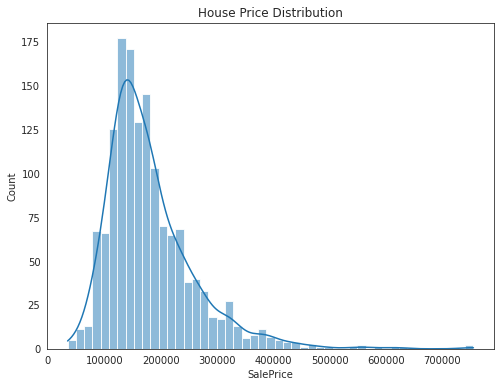

In [6]:
plt.figure(figsize=(8,6))
# Setting kde=True will add a kernel density estimate (KDE) curve to the histogram
sns.histplot(df_train['SalePrice'], kde=True)
title = plt.title("House Price Distribution")
plt.show()

In [7]:
#skewness & kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


Skewness là một chỉ số mô tả độ lệch của phân phối. Nó đo độ chệch của phân phối dữ liệu so với phân phối chuẩn (Gaussian). Nếu Skewness bằng 0, phân phối sẽ là phân phối đối xứng. Nếu Skewness < 0, phân phối sẽ lệch về bên trái, còn Skewness > 0 thì phân phối lệch về bên phải. Giá trị của Skewness càng xa 0 thì độ lệch càng lớn. Skewness: 1.882876 chứng tỏ lệch phải

Kurtosis là một chỉ số mô tả độ nhọn của phân phối. Nó đo độ dốc của đỉnh phân phối và có thể được sử dụng để so sánh với phân phối chuẩn (Gaussian). Nếu Kurtosis bằng 0, phân phối sẽ là phân phối chuẩn. Nếu Kurtosis < 0, phân phối sẽ "bẹt" hơn phân phối chuẩn và phân phối này được gọi là phân phối "flat". Nếu Kurtosis > 0, phân phối sẽ "cao" hơn phân phối chuẩn và phân phối này được gọi là phân phối "sharp". Giá trị của Kurtosis càng cao thì độ nhọn càng lớn. Kurtosis: 6.536282 chứng tỏ phân phối có đỉnh cao hơn và nhọn hơn


### 2.2. Numerical Features

Chúng ta có rất nhiều cột, vì vậy chúng ta cố gắng tìm ra các mối tương quan để hiểu rõ hơn cột nào có liên quan chặt chẽ đến Giá bán của ngôi nhà. Điều này sẽ giúp loại bỏ các features không ảnh hưởng nhiều đến công việc dự đoán Giá bán.

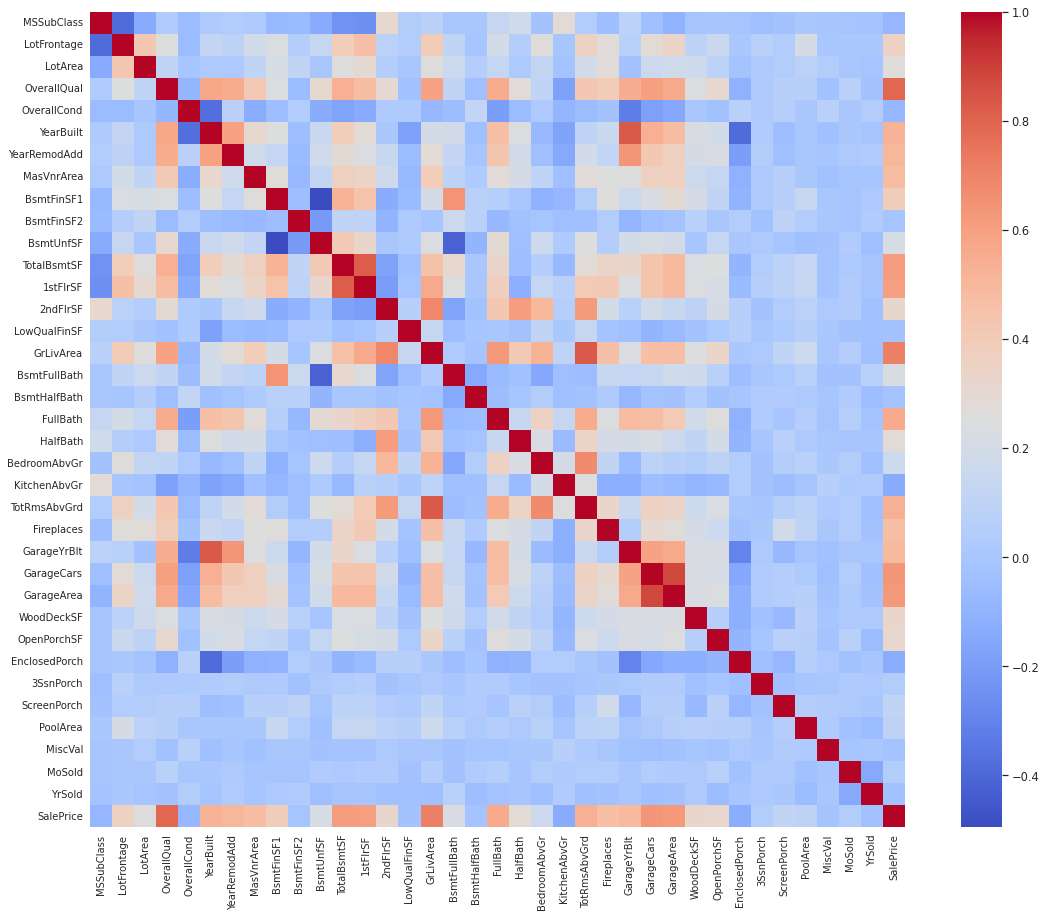

In [8]:
#correlation matrix
corrmat = df_train.corr()

#Plot a heatmap to visualize the correlations
f, ax = plt.subplots(figsize=(20, 15))
sns.set(font_scale=1.05)
sns.heatmap(corrmat, square=True,cmap='coolwarm');

Tương ứng với SalePrice, cột nào có màu đỏ càng đậm chứng tỏ có liên quan nhiều đến SalePrice

* Top 10 biến số có liên quan nhiều đến `SalePrice`:

In [9]:
correlations = corrmat["SalePrice"].sort_values(ascending=False)
features = correlations.index[0:10]
features

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

Biểu đồ thể hiện phân phối giá bán nhà theo top 10 biến features

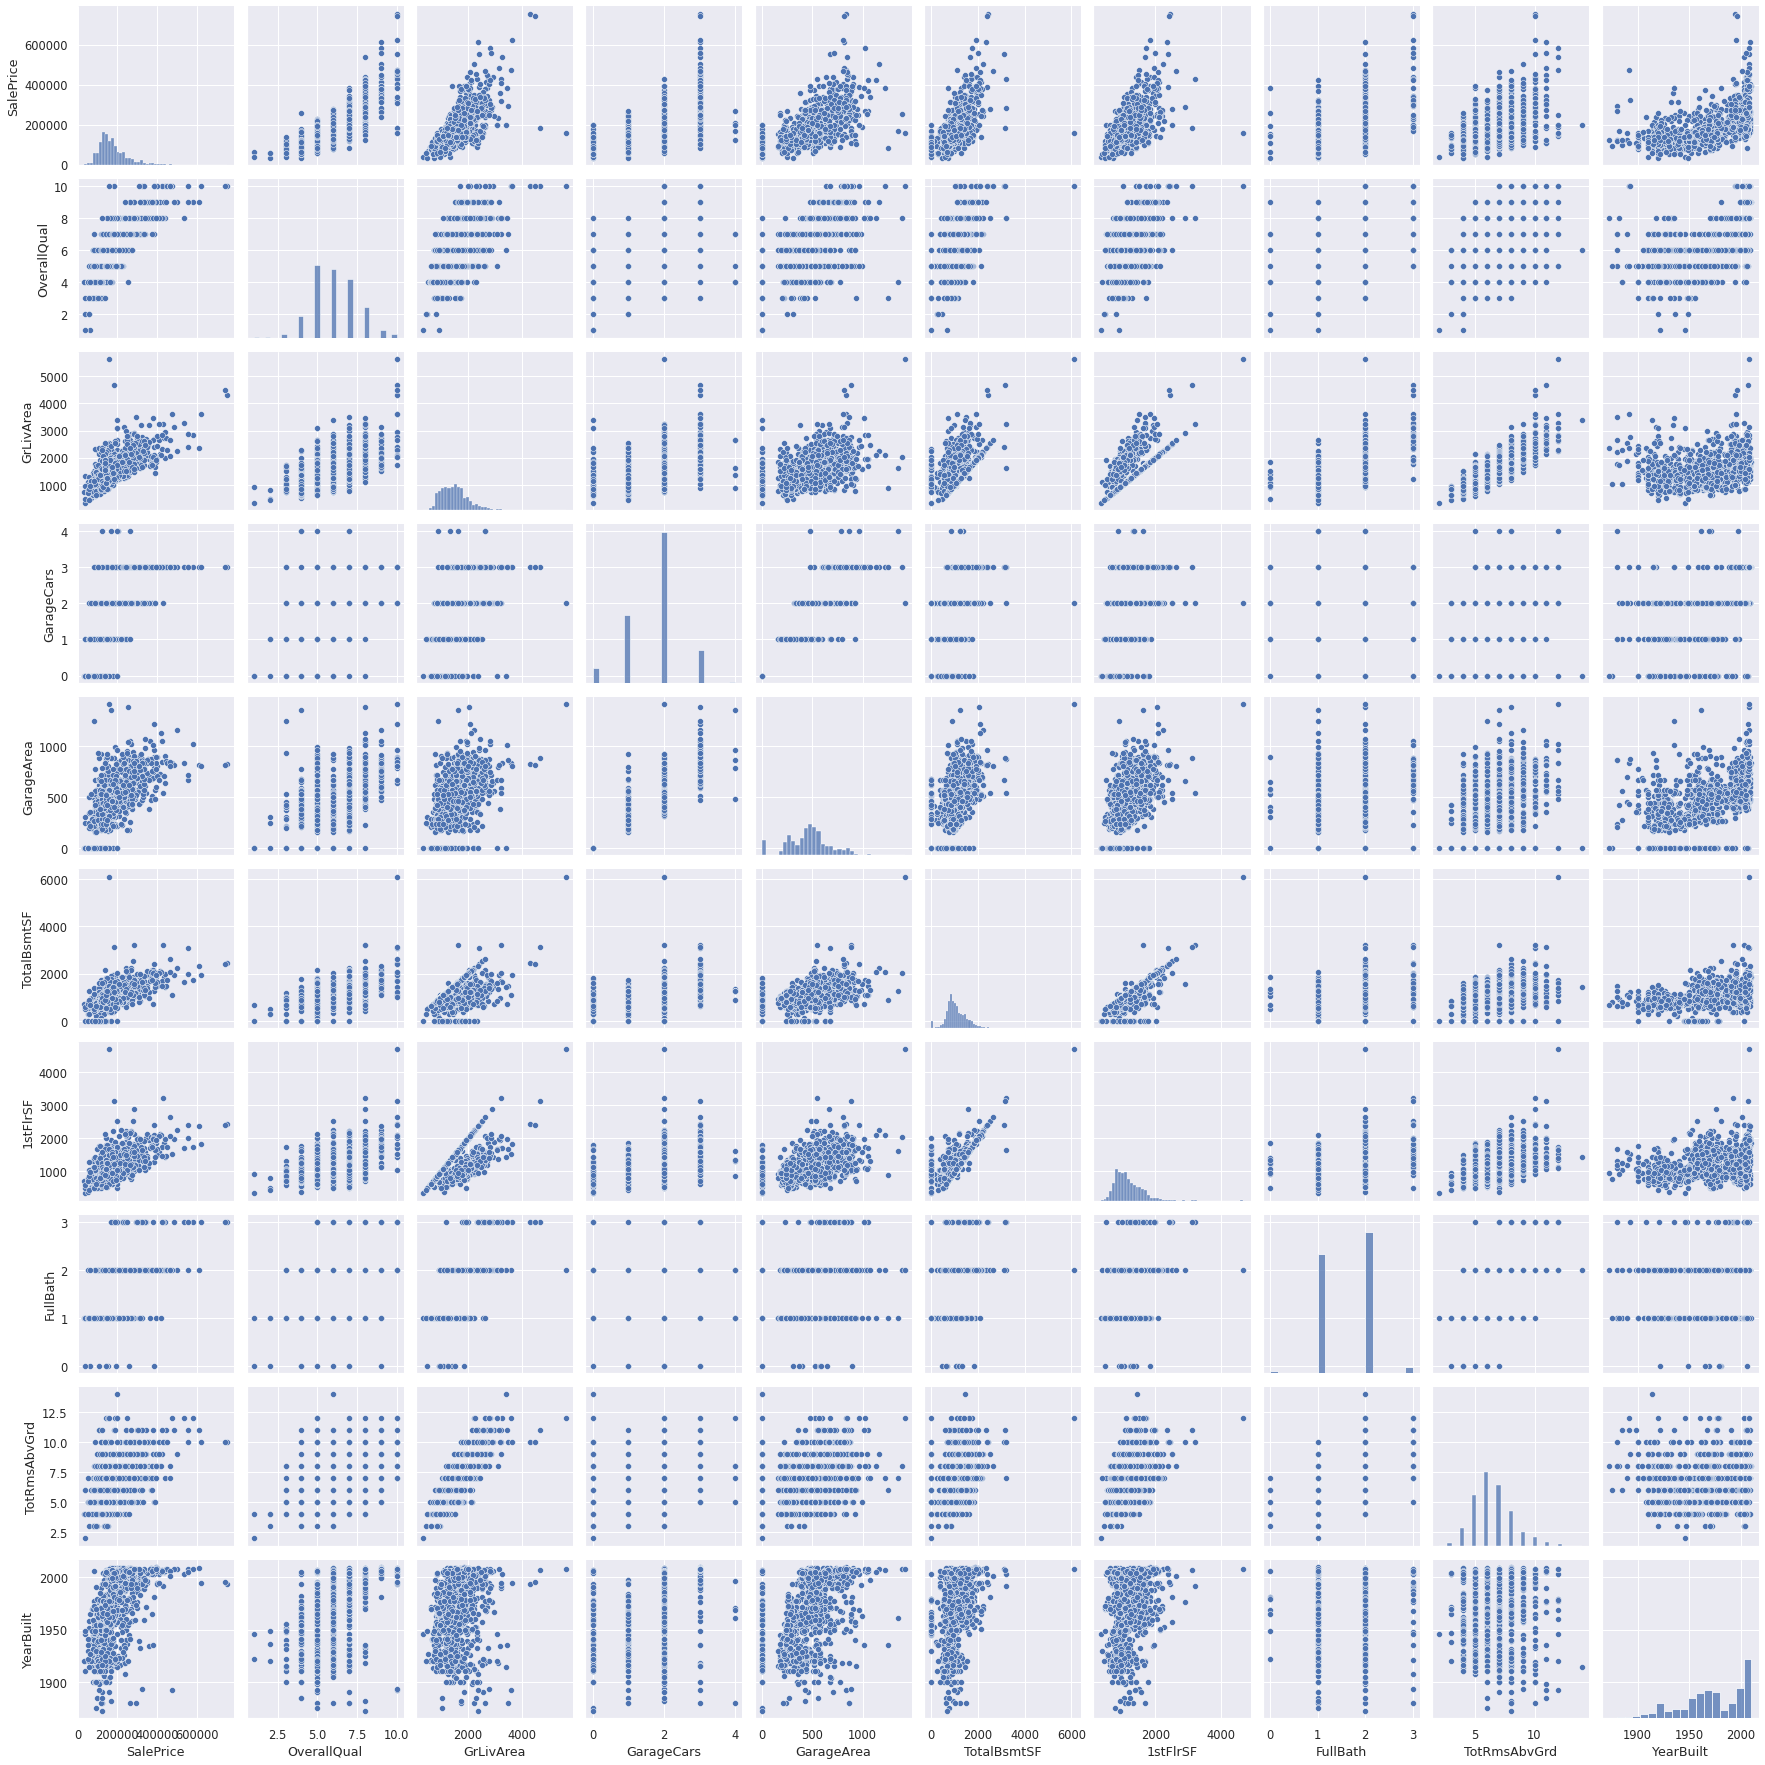

In [10]:
sns.pairplot(df_train[features], height = 2.5)
plt.show();

## 3. Tiền xử lý dữ liệu

### 3.1. Xử lý dữ liệu Null

In [11]:
training_null = pd.isnull(df_train).sum()
testing_null = pd.isnull(df_test).sum()

null = pd.concat([training_null, testing_null], axis=1, keys=["Training", "Testing"])
null.sort_values(by='Training',ascending=False).head(40)

,Training,Testing
PoolQC,1453,1456.0
MiscFeature,1406,1408.0
Alley,1369,1352.0
Fence,1179,1169.0
FireplaceQu,690,730.0
LotFrontage,259,227.0
GarageYrBlt,81,78.0
GarageCond,81,78.0
GarageType,81,76.0
GarageFinish,81,78.0


In [12]:
#lọc ra trường có nhiều giá trị Null / ít gia trị Null
null_many = null[null.sum(axis=1) > 200]  
null_few = null[(null.sum(axis=1) > 0) & (null.sum(axis=1) < 200)]  
null_many.sort_values(by='Training',ascending=False).head(40)

,Training,Testing
PoolQC,1453,1456.0
MiscFeature,1406,1408.0
Alley,1369,1352.0
Fence,1179,1169.0
FireplaceQu,690,730.0
LotFrontage,259,227.0


In [13]:
#List ra các trường có dữ liệu Null
null_with_meaning = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", 
                     "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]

In [14]:
#Thay thế giá trị Null bằng "None"
for i in null_with_meaning:
    df_train[i].fillna("None", inplace=True)
    df_test[i].fillna("None", inplace=True)
    data[i].fillna("None", inplace=True)

In [15]:
# Drop bớt LotFrontage do có số lượng Null value lớn và không ảnh hưởng nhiều đến SalePrice
df_train.drop("LotFrontage", axis=1, inplace=True)
df_test.drop("LotFrontage", axis=1, inplace=True)
data.drop("LotFrontage", axis=1, inplace=True)

In [16]:
null_few.sort_values(by='Training',ascending=False)

,Training,Testing
GarageFinish,81,78.0
GarageCond,81,78.0
GarageQual,81,78.0
GarageType,81,76.0
GarageYrBlt,81,78.0
BsmtExposure,38,44.0
BsmtFinType2,38,42.0
BsmtFinType1,37,42.0
BsmtQual,37,44.0
BsmtCond,37,45.0


In [17]:
# Các đặc trưng (features) GarageYrBlt, MasVnrArea, MasVnrType khá nhiều giá trị Null, tôi sẽ fill các giá trị phù hợp
df_train["GarageYrBlt"].fillna(df_train["GarageYrBlt"].mean(), inplace=True)
df_test["GarageYrBlt"].fillna(df_test["GarageYrBlt"].mean(), inplace=True)
data["GarageYrBlt"].fillna(data["GarageYrBlt"].mean(), inplace=True)
df_train["MasVnrArea"].fillna(df_train["MasVnrArea"].mean(), inplace=True)
df_test["MasVnrArea"].fillna(df_test["MasVnrArea"].mean(), inplace=True)
data["MasVnrArea"].fillna(data["MasVnrArea"].mean(), inplace=True)
df_train["MasVnrType"].fillna("None", inplace=True)
df_test["MasVnrType"].fillna("None", inplace=True)
data["MasVnrType"].fillna("None", inplace=True)

In [18]:
# Lọc ra các đặc trưng theo kiểu dữ liệu
types_train = df_train.dtypes #type of each feature in data: int, float, object
num_train = types_train[(types_train == int) | (types_train == float)] #numerical values are either type int or float
cat_train = types_train[types_train == object] #categorical values are type object

#we do the same for the test set
types_test = df_test.dtypes
num_test = types_test[(types_test == int) | (types_test == float)]
cat_test = types_test[types_test == object]

#we do the same for the test set
types_data = df_test.dtypes
num_data = types_data[(types_data == int) | (types_data == float)]
cat_data = types_test[types_data == object]

In [19]:

# Chuyển sang kiểu list để dễ xử lý
numerical_values_train = list(num_train.index)
numerical_values_test = list(num_test.index)
numerical_values_data = list(num_data.index)

In [20]:
# Điền giá trị trung bình cho các ô Null
for i in numerical_values_train:
    df_train[i].fillna(df_train[i].mean(), inplace=True)
for i in numerical_values_test:
    df_test[i].fillna(df_test[i].mean(), inplace=True)
for i in numerical_values_data:
    data[i].fillna(data[i].mean(), inplace=True)

In [21]:
df_train.shape, df_test.shape

((1460, 79), (1459, 78))

In [22]:
categorical_values_train = list(cat_train.index)
categorical_values_test = list(cat_test.index)
#categorical_values_data = list(cat_data.index)

In [23]:
fill_cat = []
for i in categorical_values_train:
    if i in list(null_few.index):
        fill_cat.append(i)
print(fill_cat)

['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'SaleType']


In [24]:
def most_common_term(lst):
    lst = list(lst)
    return max(set(lst), key=lst.count)
#most_common_term tìm các giá trị có tần suất xuất hiện cao nhất
most_common = []
for i in fill_cat:
    most_common.append(most_common_term(data[i]))  
most_common

['RL',
 'AllPub',
 'VinylSd',
 'VinylSd',
 'None',
 'TA',
 'TA',
 'No',
 'Unf',
 'Unf',
 'SBrkr',
 'TA',
 'Typ',
 'Attchd',
 'Unf',
 'TA',
 'TA',
 'WD']

In [25]:
# Hiển thị các giá trị phổ biến nhất ứng với từng features
most_common_dictionary = {fill_cat[0]: [most_common[0]], fill_cat[1]: [most_common[1]], fill_cat[2]: [most_common[2]], fill_cat[3]: [most_common[3]],
                          fill_cat[4]: [most_common[4]], fill_cat[5]: [most_common[5]], fill_cat[6]: [most_common[6]], fill_cat[7]: [most_common[7]],
                          fill_cat[8]: [most_common[8]]}
most_common_dictionary

{'MSZoning': ['RL'],
 'Utilities': ['AllPub'],
 'Exterior1st': ['VinylSd'],
 'Exterior2nd': ['VinylSd'],
 'MasVnrType': ['None'],
 'BsmtQual': ['TA'],
 'BsmtCond': ['TA'],
 'BsmtExposure': ['No'],
 'BsmtFinType1': ['Unf']}

In [26]:
# Fill data theo most_common_dictionary tương ứng
k = 0
for i in fill_cat:  
    df_train[i].fillna(most_common[k], inplace=True)
    df_test[i].fillna(most_common[k], inplace=True)
    data[i].fillna(most_common[k], inplace=True)
    k += 1

In [27]:
# Kiểm tra lại kết quả tiền xử lý
training_null = pd.isnull(df_train).sum()
testing_null = pd.isnull(df_test).sum()
null = pd.concat([training_null, testing_null], axis=1, keys=["Training", "Testing"])
null[null.sum(axis=1) > 0]

,Training,Testing


### 3.2. Xử lý các đặc trưng (Feature Engineering)

Tạo ra các đặc trưng (features) mới từ dữ liệu ban đầu để giúp các mô hình máy học hoạt động hiệu quả hơn và đạt kết quả tốt hơn

<AxesSubplot:>

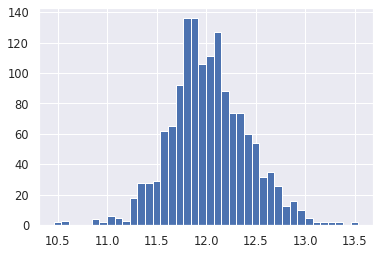

In [28]:
# Phân bổ SalePrice ban đầu có xu hướng lệch phải. 
# Thử hiển thị SalsPrice sau khi dùng Logarit
(np.log(df_train["SalePrice"])).hist(bins = 40)
# Tôi thấy rằng phân bổ đã tốt hơn ban đầu.

In [29]:
df_train["LogPrice"] = np.log(df_train["SalePrice"])
df_train.head()

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LogPrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,...,None,None,None,0,2,2008,WD,Normal,208500,12.247694
2,20,RL,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,...,None,None,None,0,5,2007,WD,Normal,181500,12.109011
3,60,RL,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,...,None,None,None,0,9,2008,WD,Normal,223500,12.317167
4,70,RL,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,...,None,None,None,0,2,2006,WD,Abnorml,140000,11.849398
5,60,RL,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,...,None,None,None,0,12,2008,WD,Normal,250000,12.429216


In [30]:
# Tạo thêm các đặc trưng 

df_train_add = df_train.copy()

df_train_add['TotalSF']=df_train_add['TotalBsmtSF'] + df_train_add['1stFlrSF'] + df_train_add['2ndFlrSF']

df_train_add['Total_Bathrooms'] = (df_train_add['FullBath'] + (0.5 * df_train_add['HalfBath']) +
                               df_train_add['BsmtFullBath'] + (0.5 * df_train_add['BsmtHalfBath']))

df_train_add['Total_porch_sf'] = (df_train_add['OpenPorchSF'] + df_train_add['3SsnPorch'] +
                              df_train_add['EnclosedPorch'] + df_train_add['ScreenPorch'] +
                              df_train_add['WoodDeckSF'])

df_test_add = df_test.copy()

df_test_add['TotalSF']=df_test_add['TotalBsmtSF'] + df_test_add['1stFlrSF'] + df_test_add['2ndFlrSF']

df_test_add['Total_Bathrooms'] = (df_test_add['FullBath'] + (0.5 * df_test_add['HalfBath']) +
                               df_test_add['BsmtFullBath'] + (0.5 * df_test_add['BsmtHalfBath']))

df_test_add['Total_porch_sf'] = (df_test_add['OpenPorchSF'] + df_test_add['3SsnPorch'] +
                              df_test_add['EnclosedPorch'] + df_test_add['ScreenPorch'] +
                              df_test_add['WoodDeckSF'])

In [31]:
## Ví dụ nếu PoolArea = 0 thì HasPool = 0. Các trường khác tương tự theo biểu thức lamda bên dưới
df_train_add['haspool'] = df_train_add['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
df_train_add['has2ndfloor'] = df_train_add['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
df_train_add['hasgarage'] = df_train_add['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
df_train_add['hasbsmt'] = df_train_add['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
df_train_add['hasfireplace'] = df_train_add['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
df_test_add['haspool'] = df_test_add['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
df_test_add['has2ndfloor'] = df_test_add['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
df_test_add['hasgarage'] = df_test_add['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
df_test_add['hasbsmt'] = df_test_add['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
df_test_add['hasfireplace'] = df_test_add['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)


In [32]:
df_train[df_train["SalePrice"] > 600000 ] 
# Kiểm tra outliers giúp cho việc phát hiện và xử lý các giá trị không hợp lý hoặc sai sót trong dữ liệu.
# Những giá trị này thường là các điểm dữ liệu bất thường và không tuân theo phân phối chung của tập dữ liệu.

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LogPrice
Id,,,,,,,,,,,,,,,,,,,,,
692,60,RL,21535,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,...,None,None,None,0,1,2007,WD,Normal,755000,13.534473
899,20,RL,12919,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,...,None,None,None,0,3,2010,New,Partial,611657,13.323927
1170,60,RL,35760,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,...,None,None,None,0,7,2006,WD,Normal,625000,13.345507
1183,60,RL,15623,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,...,Ex,MnPrv,None,0,7,2007,WD,Abnorml,745000,13.521139


In [33]:
categorical_values_train = list(cat_train.index)
categorical_values_test = list(cat_test.index)
print(categorical_values_train)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [34]:
for i in categorical_values_train:
    feature_set = set(df_train[i])
    for j in feature_set:
        feature_list = list(feature_set)
        df_train.loc[df_train[i] == j, i] = feature_list.index(j)
        df_train_add.loc[df_train_add[i] == j, i] = feature_list.index(j)

for i in categorical_values_test:
    feature_set2 = set(df_test[i])
    for j in feature_set2:
        feature_list2 = list(feature_set2)
        df_test.loc[df_test[i] == j, i] = feature_list2.index(j)
        df_test_add.loc[df_test_add[i] == j, i] = feature_list2.index(j)

In [35]:
df_train_add.head()

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SalePrice,LogPrice,TotalSF,Total_Bathrooms,Total_porch_sf,haspool,has2ndfloor,hasgarage,hasbsmt,hasfireplace
Id,,,,,,,,,,,,,,,,,,,,,
1,60,1,8450,1,2,3,0,1,1,0,...,208500,12.247694,2566,3.5,61,0,1,1,1,0
2,20,1,9600,1,2,3,0,1,2,0,...,181500,12.109011,2524,2.5,298,0,0,1,1,1
3,60,1,11250,1,2,0,0,1,1,0,...,223500,12.317167,2706,3.5,42,0,1,1,1,1
4,70,1,9550,1,2,0,0,1,0,0,...,140000,11.849398,2473,2.0,307,0,1,1,1,1
5,60,1,14260,1,2,0,0,1,2,0,...,250000,12.429216,3343,3.5,276,0,1,1,1,1


In [36]:
df_train.head()

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LogPrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,1,8450,1,2,3,0,1,1,0,...,3,2,2,0,2,2008,0,1,208500,12.247694
2,20,1,9600,1,2,3,0,1,2,0,...,3,2,2,0,5,2007,0,1,181500,12.109011
3,60,1,11250,1,2,0,0,1,1,0,...,3,2,2,0,9,2008,0,1,223500,12.317167
4,70,1,9550,1,2,0,0,1,0,0,...,3,2,2,0,2,2006,0,5,140000,11.849398
5,60,1,14260,1,2,0,0,1,2,0,...,3,2,2,0,12,2008,0,1,250000,12.429216


## 4. Hyperparameter tuning, Regularization and Optimazation

### 4.1. Chia dữ liệu tập Validation

In [37]:
X_train = df_train_add.drop(["SalePrice","LogPrice"], axis=1)
y_train = df_train_add["LogPrice"]
from sklearn.model_selection import train_test_split

X_training, X_valid, y_training, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0) 
#X_valid và y_valid là validation sets
print('\nKiểm tra shape của dataframe sau khi chia train/val:\n')
print('X_train shape', X_training.shape)
print('y_train shape:', y_training.shape)
print('X_val shape:',  X_valid.shape)
print('y_val shape:',  y_valid.shape)


Kiểm tra shape của dataframe sau khi chia train/val:

X_train shape (1168, 86)
y_train shape: (1168,)
X_val shape: (292, 86)
y_val shape: (292,)


* Hàm 'train_test_split' được sử dụng để chia tập train thành 2 phần: tập train và tập validation. 
* Tập validation sẽ chiếm 20% tổng số mẫu dữ liệu.
* 'X_train' và 'y_train' là tập train ban đầu.
* 'test_size=0.2' chỉ ra tỷ lệ của tập validation, ở đây là 20%.
* 'random_state' được sử dụng để đảm bảo rằng kết quả chia dữ liệu là như nhau trong mỗi lần chạy code. 'random state' là siêu tham số (hyperparameter) được sử dụng để thiết lập seed cho trình tạo ngẫu nhiên (random generator). Thường có giá trị là 0, 1, 42.

### 4.2. Chọn model thích hợp

Bài toán dự đoán giá nhà là một bài toán dự đoán giá trị liên tục (continuous value prediction). Tôi giả định rằng giá trị của biến phụ thuộc (trong trường hợp này là giá nhà) phụ thuộc tuyến tính vào các biến độc lập (như diện tích, vị trí, số phòng ngủ, v.v...). Điều này có nghĩa là mối quan hệ giữa giá trị của biến phụ thuộc và các biến độc lập có thể được biểu diễn bằng một đường thẳng.

Tôi chọn mô hình hồi quy tuyến tính Linear Regression

Tuy nhiên, trong một số trường hợp đặc biệt, mô hình hồi quy tuyến tính có thể không phù hợp và cần sử dụng các mô hình khác như Ridge Regression, Lasso Regression, ElasticNet, v.v... để cải thiện kết quả dự đoán.

Ngoài ra có một số loại mô hình Machine Learning phổ biến khác:
* Mô hình cây quyết định (Decision Tree)
* Mô hình Random Forest
* Mô hình SVM (Support Vector Machine)
* Mô hình KNN (K-Nearest Neighbors)
* Mô hình Naive Bayes
* Mô hình Neural Networks (Mạng nơ-ron nhân tạo)
* Mô hình PCA (Principal Component Analysis)
* Mô hình Clustering (phân cụm)
* Mô hình Recommendation System (Hệ thống gợi ý)
* Mô hình Time Series Forecasting (Dự báo chuỗi thời gian)

Mô hình Linear Regression cố gắng tìm một hàm tuyến tính để xấp xỉ một mối quan hệ tuyến tính giữa các biến đầu vào và biến đầu ra. Nó được xác định bởi các hệ số hồi quy, được tìm bằng cách tối thiểu hóa sai số giữa các giá trị dự đoán và giá trị thực tế.

Tuy nhiên, mô hình Linear Regression có thể gặp phải vấn đề overfitting nếu số lượng biến đầu vào lớn hoặc biến đầu vào có tương quan mạnh. Đó là lý do vì sao các mô hình regularization như Ridge Regression (L2 regularization), Lasso Regression (L1 regularization), Gradient Boosting Regression ra đời để giải quyết vấn đề này.

* Dùng GridSearchCV để tìm hyperparameter tối ưu
* Dùng metric RMSE và R-Squared để đánh giá độ chính xác của mô hình sau khi đã áp dụng regularization.

#### 4.2.1. Mô hình LinearRegression

In [38]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
# print the intercept
print(lm.intercept_)


17.119783020375824


In [39]:
print(lm.coef_)

[-1.28499723e-04 -2.08139939e-02  2.03304387e-06  1.36526866e-01
 -8.16699763e-03 -8.97983736e-04  4.67267934e-04  1.76031557e-01
  4.28041235e-03  2.40733276e-02  1.70085698e-03 -1.03512507e-03
 -6.09957858e-02  6.47606303e-03  5.52350328e-03  7.34830565e-02
  4.24548281e-02  1.90600560e-03  9.64988858e-04 -2.12627577e-03
 -9.03733507e-03 -4.74417720e-04  1.67090641e-03  6.62738225e-03
  3.35334772e-05 -1.47608768e-02  1.00323975e-02 -1.63557990e-02
  1.66877739e-02 -2.11623387e-02  1.44883716e-04 -3.00318090e-03
  3.36465072e-05  2.43521088e-03 -5.37146127e-06 -7.15000829e-06
  2.11250273e-05 -1.12311053e-02  6.86286690e-03  7.08057729e-02
  1.53836474e-03  5.00225428e-06  3.91673126e-05  6.81447803e-05
  1.12314367e-04  1.67032663e-02 -1.82560434e-03  1.06360732e-02
  1.02129765e-02 -3.39621980e-03 -4.32213749e-02 -1.25242557e-03
  1.25235403e-02 -8.87349356e-03  2.11118789e-02  2.99345471e-03
 -9.20569403e-04 -5.27787061e-04  1.88693475e-03  4.41959128e-02
  6.95339254e-05  2.58439

In [40]:
predictions = lm.predict(X_valid)
predictions= predictions.reshape(-1,1)

In [41]:
# Tính softmax predictions
#max_prediction = np.max(predictions, axis=1, keepdims=True)
#exp_predictions = np.exp(predictions - max_prediction)
#submission_predictions = exp_predictions / np.sum(exp_predictions, axis=1, keepdims=True)


In [42]:
submission_predictions = np.exp(predictions)

In [43]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn import metrics
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_valid, submission_predictions))
print('MSE:', metrics.mean_squared_error(y_valid, submission_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, submission_predictions)))
#print('R2:', r2_score(y_valid, submission_predictions))

MAE: 179561.85092280712
MSE: 37744241658.90183
RMSE: 194278.7730528012


In [44]:
# Dùng hàm GridSearchCV để tìm hyperparameter tốt nhất
linreg = LinearRegression()
parameters_lin = {"fit_intercept" : [True, False], "positive" : [True, False], "copy_X" : [True, False]}
grid_linreg = GridSearchCV(linreg, parameters_lin, verbose=1 , scoring = "r2")
grid_linreg.fit(X_train, y_train)

print("Best LinReg Model: " + str(grid_linreg.best_params_))
print("Best Score: " + str(grid_linreg.best_score_))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best LinReg Model: {'copy_X': True, 'fit_intercept': True, 'positive': True}
Best Score: 0.8503815881284135


In [45]:
linreg = grid_linreg.best_estimator_
linreg.fit(X_training, y_training)
lin_pred = linreg.predict(X_valid)
r2_lin = r2_score(y_valid, lin_pred)
rmse_lin = np.sqrt(mean_squared_error(y_valid, lin_pred))
print("R^2 Score: " + str(r2_lin))
print("RMSE Score: " + str(rmse_lin))

R^2 Score: 0.7199440385722996
RMSE Score: 0.20591364277130536


In [46]:
scores_lin = cross_val_score(linreg, X_training, y_training, cv=5, scoring="r2")
print("Cross Validation Score: " + str(np.mean(scores_lin)))

Cross Validation Score: 0.8774337248294348


#### 4.2.2. Mô hình Ridge Regression

In [47]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters_ridge = {"fit_intercept" : [True, False], "positive" : [True, False], "copy_X" : [True, False], "solver" : ["auto"]}
grid_ridge = GridSearchCV(ridge, parameters_ridge, verbose=1, scoring="r2")
grid_ridge.fit(X_training, y_training)
print("Best Ridge Model: " + str(grid_ridge.best_params_))
print("Best Score: " + str(grid_ridge.best_score_))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Ridge Model: {'copy_X': True, 'fit_intercept': True, 'positive': False, 'solver': 'auto'}
Best Score: 0.8831186657172136


In [48]:
ridge = grid_ridge.best_estimator_
ridge.fit(X_training, y_training)
ridge_pred = ridge.predict(X_valid)
r2_ridge = r2_score(y_valid, ridge_pred)
rmse_ridge = np.sqrt(mean_squared_error(y_valid, ridge_pred))
print("R^2 Score: " + str(r2_ridge))
print("RMSE Score: " + str(rmse_ridge))

R^2 Score: 0.6967269217087015
RMSE Score: 0.21427901460839147


In [49]:
scores_ridge = cross_val_score(ridge, X_training, y_training, cv=5, scoring="r2")
print("Cross Validation Score: " + str(np.mean(scores_ridge)))

Cross Validation Score: 0.8831186657172136


#### 4.2.3. Mô hình Gradient Boosting Regression

In [50]:
from sklearn import ensemble
params = {'n_estimators': 20000, 'max_depth': 5, 'min_samples_split': 2,
          'learning_rate': 0.05, 'loss': 'squared_error', 'max_features': 20}
clf = ensemble.GradientBoostingRegressor(**params)
clf.fit(X_training, y_training)

GradientBoostingRegressor(learning_rate=0.05, max_depth=5, max_features=20,
                          n_estimators=20000)

In [51]:
clf_pred=clf.predict(X_valid)
clf_pred= clf_pred.reshape(-1,1)
r2_clf = r2_score(y_valid, clf_pred)
rmse_clf = np.sqrt(mean_squared_error(y_valid, clf_pred))
print("R^2 Score: " + str(r2_clf))
print("RMSE Score: " + str(rmse_clf))

R^2 Score: 0.8999916078989583
RMSE Score: 0.12304980597854537


In [52]:
scores_clf = cross_val_score(clf, X_training, y_training, cv=5, scoring="r2")
print("Cross Validation Score: " + str(np.mean(scores_clf)))

Cross Validation Score: 0.8988165526683032


Dựa vào kết quả, tôi lựa chọn mô hình Gradient Boosting Regression vì có giá trị R^2 cao nhất và giá trị RMSE thấp nhất. Tiếp theo tôi sẽ tối ưu hoá các siêu tham số dựa theo mô hình này.

### 4.3. Hyperparameter tuning cho Gradient Boosting

Trong quá trình huấn luyện mô hình, chúng ta cần tìm cân bằng giữa việc giảm thiểu bias và variance để tạo ra một mô hình tốt. 

* Bias cao: Mô hình có xu hướng bị underfitting, tức là nó quá đơn giản và không đủ mạnh để mô tả mối quan hệ giữa các biến đầu vào và đầu ra. Khi áp dụng hyperparameter tuning để tìm kiếm các giá trị tối ưu của các tham số mô hình, ta có thể tăng độ phức tạp của mô hình và cải thiện khả năng dự đoán của mô hình.

* Variance cao: Mô hình có xu hướng bị overfitting, tức là nó quá phức tạp và chỉ phù hợp với dữ liệu huấn luyện mà không thể tổng quát hóa tốt cho dữ liệu mới. Khi áp dụng regularization để giảm variance, ta có thể cắt giảm các tham số không quan trọng, giảm độ phức tạp của mô hình và cải thiện tính tổng quát hóa của mô hình.

Regularization và hyperparameter tuning được sử dụng để giảm thiểu variance và bias của mô hình. Với regularization, các hệ số của mô hình được điều chỉnh để giảm thiểu variance bằng cách thêm một hàm penalty vào hàm mất mát. Với hyperparameter tuning, chúng ta có thể tìm ra giá trị tối ưu cho các siêu tham số của mô hình để cân bằng giữa bias và variance.

Như vậy, việc sử dụng regularization và hyperparameter tuning giúp chúng ta kiểm soát được bias và variance của mô hình, từ đó cải thiện độ chính xác và độ tin cậy của dự đoán.

#### 4.3.1. Tuning siêu tham số learning_rate

Trong Gradient Boosting, learning_rate là một hyperparameter quan trọng, quyết định mức độ ảnh hưởng của mỗi cây quyết định trong quá trình tối ưu hóa tổng hợp.

Learning_rate thể hiện tỉ lệ mà mỗi cây quyết định ảnh hưởng đến dự đoán cuối cùng. Nó được sử dụng để điều chỉnh sự cập nhật của các hệ số trong từng bước boosting, giúp tránh overfitting và cải thiện hiệu suất của mô hình.

Với learning rate nhỏ, mô hình sẽ hội tụ chậm hơn, nhưng thường đạt được kết quả tốt hơn. Tuy nhiên, khi sử dụng learning rate quá lớn, mô hình có thể bị overfitting hoặc không hội tụ được.

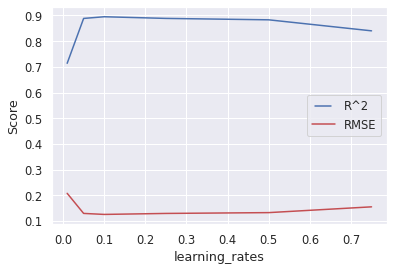

In [53]:
learning_rates = [0.75 ,0.5, 0.25, 0.1, 0.05, 0.01]

r2_results = []
rmse_results = []

for eta in learning_rates:
    model = ensemble.GradientBoostingRegressor(learning_rate=eta)
    model.fit(X_training, y_training)
    y_pred = model.predict(X_valid)
    r2_clf = r2_score(y_valid, y_pred)
    rmse_clf = np.sqrt(mean_squared_error(y_valid, y_pred))
    r2_results.append(r2_clf)
    rmse_results.append(rmse_clf)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, r2_results, 'b', label='R^2')
line2, = plt.plot(learning_rates, rmse_results, 'r', label='RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Score')
plt.xlabel('learning_rates')
plt.show()

# Dùng đoạn code sau để in ra chính xác giá trị learning rate tốt nhất
#best_learning_rate = learning_rates[np.argmax(r2_results)]
#print('Best learning rate:', best_learning_rate)

Quan sát biểu đồ có thể thấy giá trị tốt nhất của learning rate (có score cao nhất) nằm trong khoảng 0.0 đến 0.2

Càng tăng learning rate thì chỉ số R^2 giảm => hiện tượng tăng overfitting

#### 4.3.2. Tuning siêu tham số n_estimators

n_estimations là một hyperparameter trong mô hình Gradient Boosting, quyết định số lượng cây quyết định sẽ được sử dụng trong quá trình tạo ra mô hình. Nó thể hiện số lượng các cây quyết định được sử dụng để tính trọng số cho các điểm dữ liệu và học từ chúng.

Với giá trị n_estimators lớn, mô hình có thể đạt được kết quả tốt hơn, tuy nhiên, điều này cũng đồng nghĩa với việc tốn nhiều thời gian tính toán và năng lượng tính toán. Bên cạnh đó, nếu giá trị của n_estimators quá lớn, mô hình có thể bị overfitting và dẫn đến hiệu suất kém trên tập dữ liệu kiểm tra.



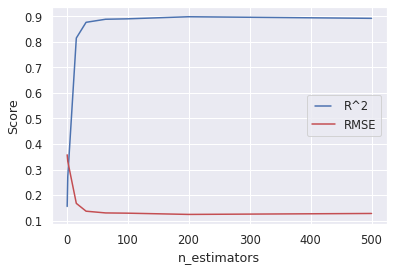

In [54]:
n_estimators = [1, 2, 16, 32, 64, 100, 200, 500]
r2_results = []
rmse_results = []

for estimator in n_estimators:
    model = ensemble.GradientBoostingRegressor(n_estimators=estimator)
    model.fit(X_training, y_training)
    y_pred = model.predict(X_valid)
    r2_clf = r2_score(y_valid, y_pred)
    rmse_clf = np.sqrt(mean_squared_error(y_valid, y_pred))
    r2_results.append(r2_clf)
    rmse_results.append(rmse_clf)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, r2_results, 'b', label='R^2')
line2, = plt.plot(n_estimators, rmse_results, 'r', label='RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Score')
plt.xlabel('n_estimators')
plt.show()

# Dùng đoạn code sau để in ra chính xác giá trị n_estimators tốt nhất
#best_n_estimators = n_estimators[np.argmax(r2_results)]
#print('Best n_estimators:', best_n_estimators)

Quan sát biểu đồ có thể thấy giá trị tốt nhất của n_estimators (có score cao nhất) nằm trong khoảng 100 đến 500

Càng tăng n_estimators thì chỉ số R^2 giảm => hiện tượng tăng overfitting

#### 4.3.3. Tuning siêu tham số max_depth

* max_depth là một hyperparameter khác trong mô hình Gradient Boosting, quyết định độ sâu tối đa của mỗi cây trong ensemble. Nó thể hiện số lượng node tối đa được phép trong một cây.

* Với giá trị max_depth lớn, mô hình có thể học được nhiều chi tiết hơn trong dữ liệu huấn luyện, tuy nhiên, điều này có thể dẫn đến overfitting. Vì vậy, giá trị tối ưu cho max_depth phụ thuộc vào tập dữ liệu và mục tiêu của mô hình.

* Nếu max_depth quá thấp, cây sẽ không đủ sâu để học được các mô hình phức tạp, do đó giảm độ chính xác của mô hình trên tập dữ liệu huấn luyện và kiểm tra.

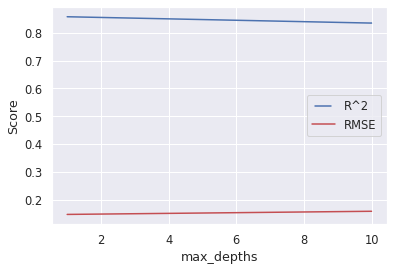

In [55]:
max_depths = [1, 10, 10]
r2_results = []
rmse_results = []

for max_depth in max_depths:
    model = ensemble.GradientBoostingRegressor(max_depth=max_depth)
    model.fit(X_training, y_training)
    y_pred = model.predict(X_valid)
    r2_clf = r2_score(y_valid, y_pred)
    rmse_clf = np.sqrt(mean_squared_error(y_valid, y_pred))
    r2_results.append(r2_clf)
    rmse_results.append(rmse_clf)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, r2_results, 'b', label='R^2')
line2, = plt.plot(max_depths, rmse_results, 'r', label='RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Score')
plt.xlabel('max_depths')
plt.show()

Nếu lấy đường giao của RMSE và R^2 thì chọn max_depths = 5 là tối ưu nhất

#### 4.3.4. Tuning siêu tham số min_samples_leafs 

* min_samples_leaf xác định số lượng tối thiểu các mẫu (samples) được yêu cầu có trong một nút lá (leaf node) trên cây quyết định. Nếu số lượng mẫu nhiều hơn hoặc bằng min_samples_leaf, cây quyết định được tiếp tục chia ra thành các nhánh (branches). Nếu số lượng mẫu ít hơn min_samples_leaf, cây sẽ không được chia nhánh và trở thành một nút lá (leaf node).

* Khi giá trị "min_samples_leaf" quá thấp, mô hình sẽ tạo ra cây quyết định quá phức tạp vì nó phân tách các nút quá nhỏ. Khi đó, mô hình có khả năng bị quá khớp dữ liệu huấn luyện, có nghĩa là nó sẽ không thể dự đoán tốt trên dữ liệu mới.

* Tương tự, khi giá trị "min_samples_leaf" quá cao, các cây quyết định trở nên quá đơn giản và không thể mô tả mối quan hệ phức tạp giữa các biến đầu vào và đầu ra. Điều này có thể dẫn đến underfitting, nghĩa là mô hình không thể học được các mẫu trong dữ liệu huấn luyện và không thể dự đoán tốt trên dữ liệu mới.



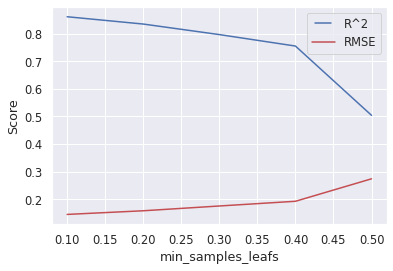

In [56]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
r2_results = []
rmse_results = []

for min_samples_leaf in min_samples_leafs:
    model = ensemble.GradientBoostingRegressor(min_samples_leaf=min_samples_leaf)
    model.fit(X_training, y_training)
    y_pred = model.predict(X_valid)
    r2_clf = r2_score(y_valid, y_pred)
    rmse_clf = np.sqrt(mean_squared_error(y_valid, y_pred))
    r2_results.append(r2_clf)
    rmse_results.append(rmse_clf)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, r2_results, 'b', label='R^2')
line2, = plt.plot(min_samples_leafs, rmse_results, 'r', label='RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Score')
plt.xlabel('min_samples_leafs')
plt.show()

Nếu lấy đường giao của RMSE và R^2 thì chọn min_samples_leafs từ 0.2 đến 0.4 là tối ưu nhất

#### 4.3.5. Tuning siêu tham số Max_features

* max_features giới hạn số lượng biến đầu vào mà mô hình có thể sử dụng để tìm ra cách phân loại tốt nhất các điểm dữ liệu. Nếu max_features được đặt là "sqrt" (tức căn bậc hai của số lượng biến đầu vào), một nửa số lượng biến đầu vào được chọn ngẫu nhiên để xây dựng cây quyết định tại mỗi nút. Nếu max_features được đặt là "log2" (tức logarit cơ số 2 của số lượng biến đầu vào), một số lượng biến đầu vào bằng với logarit cơ số 2 của tổng số lượng biến đầu vào sẽ được chọn ngẫu nhiên để xây dựng cây quyết định tại mỗi nút.

* Việc chọn giá trị max_features phù hợp là rất quan trọng trong quá trình xây dựng mô hình dựa trên cây quyết định. Khi giá trị max_features quá lớn, mô hình có thể trở nên quá phức tạp và có khả năng overfitting dữ liệu huấn luyện. Ngược lại, nếu giá trị max_features quá nhỏ, mô hình có thể bị thiếu khả năng khái quát hóa (underfitting) và không thể dự đoán tốt trên dữ liệu mới.

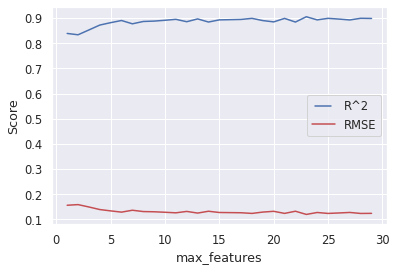

In [57]:
max_features = list(range(1,30))
r2_results = []
rmse_results = []

for max_feature in max_features:
    model = ensemble.GradientBoostingRegressor(max_features=max_feature)
    model.fit(X_training, y_training)
    y_pred = model.predict(X_valid)
    r2_clf = r2_score(y_valid, y_pred)
    rmse_clf = np.sqrt(mean_squared_error(y_valid, y_pred))
    r2_results.append(r2_clf)
    rmse_results.append(rmse_clf)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, r2_results, 'b', label='R^2')
line2, = plt.plot(max_features, rmse_results, 'r', label='RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Score')
plt.xlabel('max_features')
plt.show()

Chọn _max_features từ 10 đến 20 là tối ưu nhất

### 4.4 Optimization sử dụng TensorFlow

In [58]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, metrics
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd
import numpy as np

def plot_scores(history):
    # Extracting RMSE and validation RMSE scores
    rmse = history.history['rmse']
    val_rmse = history.history['val_rmse']

    # Plotting RMSE and validation RMSE
    epochs = range(1, len(rmse) + 1)
    plt.plot(epochs, rmse, 'b', label='Training RMSE')
    plt.plot(epochs, val_rmse, 'r', label='Validation RMSE')
    plt.title('Training and Validation RMSE')
    plt.xlabel('Epochs')
    plt.ylabel('RMSE')
    plt.legend()
    plt.show()


Epoch 1/100
37/37 [==============================] - 6s 36ms/step - loss: 140.1622 - rmse: 11.8390 - mse: 140.1622 - mae: 11.8209 - val_loss: 135.4463 - val_rmse: 11.6381 - val_mse: 135.4463 - val_mae: 11.6082
Epoch 2/100
37/37 [==============================] - 0s 11ms/step - loss: 127.1059 - rmse: 11.2741 - mse: 127.1059 - mae: 11.2633 - val_loss: 120.1364 - val_rmse: 10.9607 - val_mse: 120.1364 - val_mae: 10.9384
Epoch 3/100
37/37 [==============================] - 1s 16ms/step - loss: 108.0571 - rmse: 10.3951 - mse: 108.0571 - mae: 10.3800 - val_loss: 96.2181 - val_rmse: 9.8091 - val_mse: 96.2181 - val_mae: 9.7955
Epoch 4/100
37/37 [==============================] - 1s 18ms/step - loss: 84.0826 - rmse: 9.1697 - mse: 84.0826 - mae: 9.1482 - val_loss: 69.1761 - val_rmse: 8.3172 - val_mse: 69.1761 - val_mae: 8.2698
Epoch 5/100
37/37 [==============================] - 1s 15ms/step - loss: 58.8022 - rmse: 7.6683 - mse: 58.8022 - mae: 7.6335 - val_loss: 43.2851 - val_rmse: 6.5791 - val_m

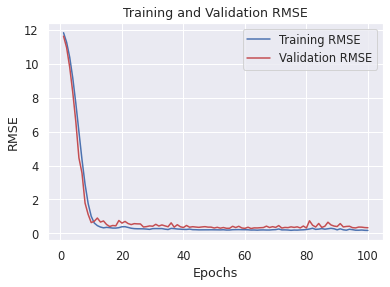

In [60]:
# Preprocessing
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_valid = X_valid.astype('float32')
y_valid = y_valid.astype('float32')
# Create model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[X_train.shape[1]]),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(1)
])

# Compile model
history = model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-3),
    loss='mean_squared_error',
    metrics=[
        metrics.RootMeanSquaredError(name='rmse'),
        metrics.MeanSquaredError(name='mse'),
        metrics.MeanAbsoluteError(name='mae')
    ]
)

# Train model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2
)

# Predict on validation set
y_pred = model.predict(X_valid)

# Evaluate model on validation set
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
r2 = r2_score(y_valid, y_pred)
print('RMSE:', rmse)
print('R2 score:', r2)
plot_scores(history)

Epoch 1/20
37/37 [==============================] - 0s 10ms/step - loss: 0.0346 - rmse: 0.1861 - mse: 0.0346 - mae: 0.1332 - val_loss: 0.1007 - val_rmse: 0.3174 - val_mse: 0.1007 - val_mae: 0.2239
Epoch 2/20
37/37 [==============================] - 0s 7ms/step - loss: 0.0388 - rmse: 0.1970 - mse: 0.0388 - mae: 0.1481 - val_loss: 0.1195 - val_rmse: 0.3456 - val_mse: 0.1195 - val_mae: 0.2567
Epoch 3/20
37/37 [==============================] - 0s 7ms/step - loss: 0.0333 - rmse: 0.1825 - mse: 0.0333 - mae: 0.1332 - val_loss: 0.2210 - val_rmse: 0.4701 - val_mse: 0.2210 - val_mae: 0.3922
Epoch 4/20
37/37 [==============================] - 0s 7ms/step - loss: 0.0320 - rmse: 0.1790 - mse: 0.0320 - mae: 0.1331 - val_loss: 0.1579 - val_rmse: 0.3974 - val_mse: 0.1579 - val_mae: 0.3029
Epoch 5/20
37/37 [==============================] - 0s 8ms/step - loss: 0.0344 - rmse: 0.1855 - mse: 0.0344 - mae: 0.1334 - val_loss: 0.1191 - val_rmse: 0.3451 - val_mse: 0.1191 - val_mae: 0.2337
Epoch 6/20
37/37 [=

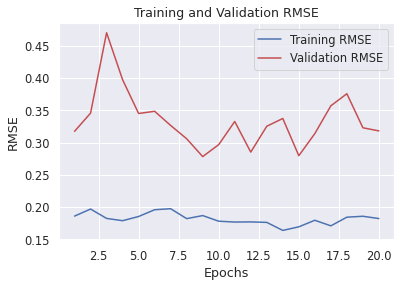

In [61]:
# Train model
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2
)
# Predict on validation set
y_pred = model.predict(X_valid)

# Evaluate model on validation set
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
r2 = r2_score(y_valid, y_pred)
print('RMSE:', rmse)
print('R2 score:', r2)
plot_scores(history)

Epoch 1/5
37/37 [==============================] - 0s 10ms/step - loss: 0.0332 - rmse: 0.1823 - mse: 0.0332 - mae: 0.1328 - val_loss: 0.1126 - val_rmse: 0.3356 - val_mse: 0.1126 - val_mae: 0.2331
Epoch 2/5
37/37 [==============================] - 0s 7ms/step - loss: 0.0390 - rmse: 0.1975 - mse: 0.0390 - mae: 0.1467 - val_loss: 0.1459 - val_rmse: 0.3819 - val_mse: 0.1459 - val_mae: 0.2867
Epoch 3/5
37/37 [==============================] - 0s 7ms/step - loss: 0.0345 - rmse: 0.1858 - mse: 0.0345 - mae: 0.1350 - val_loss: 0.1035 - val_rmse: 0.3217 - val_mse: 0.1035 - val_mae: 0.1989
Epoch 4/5
37/37 [==============================] - 0s 7ms/step - loss: 0.0349 - rmse: 0.1868 - mse: 0.0349 - mae: 0.1356 - val_loss: 0.0989 - val_rmse: 0.3146 - val_mse: 0.0989 - val_mae: 0.1796
Epoch 5/5
10/10 [==============================] - 0s 3ms/step
RMSE: 0.29930466
R2 score: 0.4083000509617468


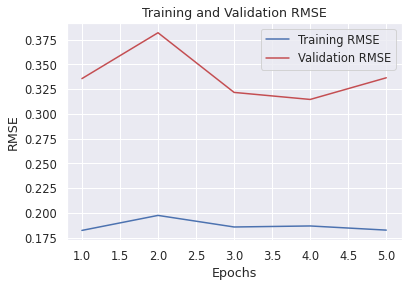

In [62]:
# Train model
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.2
)
# Predict on validation set
y_pred = model.predict(X_valid)

# Evaluate model on validation set
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
r2 = r2_score(y_valid, y_pred)
print('RMSE:', rmse)
print('R2 score:', r2)
plot_scores(history)

So sánh 3 kết quả, khi điều chỉnh epochs [5, 20, 200] thì 2 metric RMSE và R2 core thay đổi không tuyến tính. Nếu số lượng epoch quá lớn, mô hình có thể bị overfitting trên tập huấn luyện, điển hình là khi tăng epochs từ 20 lên 100 thì R2 giảm. 

Khi giảm epochs từ 20 xuống 5 thì R2 cũng giảm => Chúng ta cần thực hiện việc tinh chỉnh siêu tham số epochs này bằng cách thử nghiệm và so sánh kết quả trên tập huấn luyện và tập validation nhiều lần để tìm ra tham số tối ưu nhất.